In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from soccerplots.radar_chart import Radar

In [19]:
# read in data
standard = pd.read_html("https://fbref.com/en/comps/Big5/2023-2024/stats/players/2023-2024-Big-5-European-Leagues-Stats")[0]
shooting = pd.read_html("https://fbref.com/en/comps/Big5/2023-2024/shooting/players/2023-2024-Big-5-European-Leagues-Stats")[0]
passing = pd.read_html("https://fbref.com/en/comps/Big5/2023-2024/passing/players/2023-2024-Big-5-European-Leagues-Stats")[0]
sca = pd.read_html("https://fbref.com/en/comps/Big5/2023-2024/gca/players/2023-2024-Big-5-European-Leagues-Stats")[0]
defensive = pd.read_html("https://fbref.com/en/comps/Big5/2023-2024/defense/players/2023-2024-Big-5-European-Leagues-Stats")[0]

In [21]:
# clean data function
def data_clean(df):
    
    # convert the data into dataframe
    df = pd.DataFrame(df)
    # drop the multi-level columns
    df.columns = df.columns.droplevel(0)

    # filter for bundesliga 
    df[['an', 'comp']] = df['Comp'].str.split(' ', n=1, expand=True)
    df = df.drop(columns=['an', 'Comp'])
    df = df[df['Player'] != 'Player']
    df = df[df['comp'] == 'Bundesliga']
    
    # drop unnecessary columns
    df = df.drop(['Rk', 'Nation', 'Pos', 'comp', 'Squad', 'Age', 'Born', 'Matches'], axis=1)

    return df

In [33]:
# collect new data frames
standard_df = data_clean(standard)
shooting_df = data_clean(shooting)
passing_df = data_clean(passing)
sca_df = data_clean(sca)
defensive_df = data_clean(defensive)

In [34]:
# let's clean a few specific columns 
# Standard
standard_df['progCP'] = standard_df['PrgC'] + standard_df['PrgP']
standard_df = standard_df[['Player', '90s', 'progCP']]

standard_df.head()

,Player,90s,progCP
1,Brenden Aaronson,14.1,3756
2,Paxten Aaronson,1.1,25
18,Junior Adamu,1.2,11
19,Sargis Adamyan,8.9,1518
22,Karim Adeyemi,10.1,5226


In [35]:
# Shooting
shooting_df = shooting_df[['Player', 'Gls', 'SoT']]
shooting_df.head()

,Player,Gls,SoT
1,Brenden Aaronson,2,7
2,Paxten Aaronson,0,2
18,Junior Adamu,0,1
19,Sargis Adamyan,1,13
22,Karim Adeyemi,3,10


In [36]:
# Passing
passing_df.columns.values[2] = 'total_cmp'

passing_df = passing_df[['Player', 'total_cmp', 'Ast', 'KP', 'PPA', 'CrsPA']]
passing_df.head()


,Player,total_cmp,Ast,KP,PPA,CrsPA
1,Brenden Aaronson,365,2,22,14,3
2,Paxten Aaronson,41,1,1,2,0
18,Junior Adamu,18,0,1,1,0
19,Sargis Adamyan,132,2,12,3,0
22,Karim Adeyemi,218,1,9,10,1


In [37]:
# Scoring Chances
sca_df = sca_df[['Player','SCA', 'GCA']]
sca_df.head()

,Player,SCA,GCA
1,Brenden Aaronson,53,8
2,Paxten Aaronson,1,1
18,Junior Adamu,2,0
19,Sargis Adamyan,31,3
22,Karim Adeyemi,25,2


In [38]:
# Defensive Actions

defensive_df = defensive_df[['Player', 'TklW', 'Int']]
defensive_df.head()

,Player,TklW,Int
1,Brenden Aaronson,18,2
2,Paxten Aaronson,2,0
18,Junior Adamu,1,0
19,Sargis Adamyan,9,5
22,Karim Adeyemi,14,3


In [143]:
# now we need to combine all these dfs together
df = pd.merge(standard_df, shooting_df, on='Player')
df = pd.merge(df, passing_df, on='Player')
df = pd.merge(df, sca_df, on='Player')
df = pd.merge(df, defensive_df, on='Player')

df.head()

,Player,90s,progCP,Gls,SoT,total_cmp,Ast,KP,PPA,CrsPA,SCA,GCA,TklW,Int
0,Brenden Aaronson,14.1,3756,2,7,365,2,22,14,3,53,8,18,2
1,Paxten Aaronson,1.1,25,0,2,41,1,1,2,0,1,1,2,0
2,Junior Adamu,1.2,11,0,1,18,0,1,1,0,2,0,1,0
3,Sargis Adamyan,8.9,1518,1,13,132,2,12,3,0,31,3,9,5
4,Karim Adeyemi,10.1,5226,3,10,218,1,9,10,1,25,2,14,3


In [139]:
# slightly edit some metrics
df['chances_created'] = df['SCA'] + df["GCA"]
df['cross_pass_pa'] = df['PPA'] + df['CrsPA']

df = df.drop(['SCA', 'GCA', 'PPA', 'CrsPA'], axis=1)

df.head()

,Player,90s,progCP,Gls,SoT,total_cmp,Ast,KP,TklW,Int,chances_created,cross_pass_pa
0,Brenden Aaronson,14.1,3756,2,7,365,2,22,18,2,538,143
1,Paxten Aaronson,1.1,25,0,2,41,1,1,2,0,11,20
2,Junior Adamu,1.2,11,0,1,18,0,1,1,0,20,10
3,Sargis Adamyan,8.9,1518,1,13,132,2,12,9,5,313,30
4,Karim Adeyemi,10.1,5226,3,10,218,1,9,14,3,252,101


In [140]:
# add row number to keep track of names
df = df.assign(row = range(len(df)))
df.head()

,Player,90s,progCP,Gls,SoT,total_cmp,Ast,KP,TklW,Int,chances_created,cross_pass_pa,row
0,Brenden Aaronson,14.1,3756,2,7,365,2,22,18,2,538,143,0
1,Paxten Aaronson,1.1,25,0,2,41,1,1,2,0,11,20,1
2,Junior Adamu,1.2,11,0,1,18,0,1,1,0,20,10,2
3,Sargis Adamyan,8.9,1518,1,13,132,2,12,9,5,313,30,3
4,Karim Adeyemi,10.1,5226,3,10,218,1,9,14,3,252,101,4


In [141]:
# utilize the minmax scaler to get comparison to other players in bundesliga
metrics = df.iloc[:, 2:12]

# initialize the scaler
scaler = MinMaxScaler()

metrics_minmax = pd.DataFrame(scaler.fit_transform(metrics), columns=metrics.columns)

# add back row number
metrics_minmax = metrics_minmax.assign(row = range(len(df)))
metrics_minmax.head()

,progCP,Gls,SoT,total_cmp,Ast,KP,TklW,Int,chances_created,cross_pass_pa,row
0,0.024526,0.055556,0.114754,0.120861,0.153846,0.173228,0.310345,0.027778,0.023272,0.018754,0
1,0.000163,0.000000,0.032787,0.013576,0.076923,0.007874,0.034483,0.000000,0.000476,0.002623,1
2,0.000072,0.000000,0.016393,0.005960,0.000000,0.007874,0.017241,0.000000,0.000865,0.001311,2
3,0.009912,0.027778,0.213115,0.043709,0.153846,0.094488,0.155172,0.069444,0.013539,0.003934,3
4,0.034125,0.083333,0.163934,0.072185,0.076923,0.070866,0.241379,0.041667,0.010901,0.013246,4


In [142]:
# join back to the player names
df = df[['Player', 'row']]

df = df.merge(metrics_minmax, on='row')
df.head()

,Player,row,progCP,Gls,SoT,total_cmp,Ast,KP,TklW,Int,chances_created,cross_pass_pa
0,Brenden Aaronson,0,0.024526,0.055556,0.114754,0.120861,0.153846,0.173228,0.310345,0.027778,0.023272,0.018754
1,Paxten Aaronson,1,0.000163,0.000000,0.032787,0.013576,0.076923,0.007874,0.034483,0.000000,0.000476,0.002623
2,Junior Adamu,2,0.000072,0.000000,0.016393,0.005960,0.000000,0.007874,0.017241,0.000000,0.000865,0.001311
3,Sargis Adamyan,3,0.009912,0.027778,0.213115,0.043709,0.153846,0.094488,0.155172,0.069444,0.013539,0.003934
4,Karim Adeyemi,4,0.034125,0.083333,0.163934,0.072185,0.076923,0.070866,0.241379,0.041667,0.010901,0.013246


In [122]:
 # filter for Florian Wirtz and Jamal Musiala
df = df[(df['Player'] == "Florian Wirtz") | (df['Player'] == "Jamal Musiala")].reset_index()

df.head()

,index,Player,row,progCP,Gls,SoT,total_cmp,Ast,KP,TklW,Int,chances_created,cross_pass_pa
0,524,Jamal Musiala,524,0.673218,0.277778,0.344262,0.205629,0.384615,0.330709,0.431034,0.222222,0.459296,0.053770
1,882,Florian Wirtz,882,0.902569,0.305556,0.540984,0.509934,0.846154,0.574803,0.310345,0.125000,0.719093,0.108459


In [123]:
# reorder the columns
df = df[['Gls', 'Ast', 'SoT', 'progCP', 'total_cmp', 'KP', 'cross_pass_pa', 'chances_created', 'TklW', 'Int', 'Player']]
df.head()

,Gls,Ast,SoT,progCP,total_cmp,KP,cross_pass_pa,chances_created,TklW,Int,Player
0,0.277778,0.384615,0.344262,0.673218,0.205629,0.330709,0.053770,0.459296,0.431034,0.222222,Jamal Musiala
1,0.305556,0.846154,0.540984,0.902569,0.509934,0.574803,0.108459,0.719093,0.310345,0.125000,Florian Wirtz


In [124]:
# rename the columns for final graphic
df.columns.values[0] = 'Goals'
df.columns.values[1] = 'Assists'
df.columns.values[2] = 'Shots on Target'
df.columns.values[3] = 'Progressive Passes and Carries'
df.columns.values[4] = 'Total Completed Passes'
df.columns.values[5] = 'Key Passes'
df.columns.values[6] = 'Cross and Passes into Penalty Area'
df.columns.values[7] = 'Chances Created'
df.columns.values[8] = 'Tackles Won'
df.columns.values[9] = 'Interceptions'

df.head()

,Goals,Assists,Shots on Target,Progressive Passes and Carries,Total Completed Passes,Key Passes,Cross and Passes into Penalty Area,Chances Created,Tackles Won,Interceptions,Player
0,0.277778,0.384615,0.344262,0.673218,0.205629,0.330709,0.053770,0.459296,0.431034,0.222222,Jamal Musiala
1,0.305556,0.846154,0.540984,0.902569,0.509934,0.574803,0.108459,0.719093,0.310345,0.125000,Florian Wirtz


In [126]:
# find the parameters
params = list(df.columns)
params = params[:-1]
print(params)

['Goals', 'Assists', 'Shots on Target', 'Progressive Passes and Carries', 'Total Completed Passes', 'Key Passes', 'Cross and Passes into Penalty Area', 'Chances Created', 'Tackles Won', 'Interceptions']


In [130]:
# create upper and lower range
ranges = [] # empty list for values to enter
jm_values = []
fw_values = []


# loop over parameters
for x in params:
    # set the min value as 0 and max as 1.0
    a = 0
    b = 1.0

    ranges.append((a,b)) # append all the ranges into the list 
    # all ranges are 0 to 100 because we used minmax scaler

for x in range(len(df["Player"])):
    if df['Player'][x] == 'Jamal Musiala': # putting all of musiala's values into a list
        jm_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Florian Wirtz':
        fw_values = df.iloc[x].values.tolist()


In [132]:
# get rid of names from list
jm_values = jm_values[:-1]
fw_values = fw_values[:-1]

values = [jm_values, fw_values]

In [133]:
# let's check ranges of these values
print(ranges) # should be all 0 and 1
print(values)

[(0, 1.0), (0, 1.0), (0, 1.0), (0, 1.0), (0, 1.0), (0, 1.0), (0, 1.0), (0, 1.0), (0, 1.0), (0, 1.0)]
[[np.float64(0.2777777777777778), np.float64(0.38461538461538464), np.float64(0.3442622950819672), np.float64(0.6732181919096282), np.float64(0.2056291390728477), np.float64(0.3307086614173228), np.float64(0.05377049180327869), np.float64(0.459295786832771), np.float64(0.43103448275862066), np.float64(0.2222222222222222)], [np.float64(0.3055555555555555), np.float64(0.8461538461538463), np.float64(0.5409836065573771), np.float64(0.9025694603153873), np.float64(0.5099337748344371), np.float64(0.5748031496062992), np.float64(0.10845901639344263), np.float64(0.7190933471753611), np.float64(0.3103448275862069), np.float64(0.125)]]


In [134]:
# set some key information here

datainfo = dict(
    title_name = "Jamal Musiala",
    title_color = "red",
    subtitle_name = "2023-2024",
    subtitle_colour = "red",

    title_name_2 = "Florian Wirtz",
    title_color_2 = "blue",
    subtitle_name_2 = "2023-2024",
    subtitle_colour_2 = "blue",

    title_fontsize = 18, 
    subtitle_fontsize = 15
)

endnote = 'Alexander Michelberger \nData from FBRef Top 5 Leagues'

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

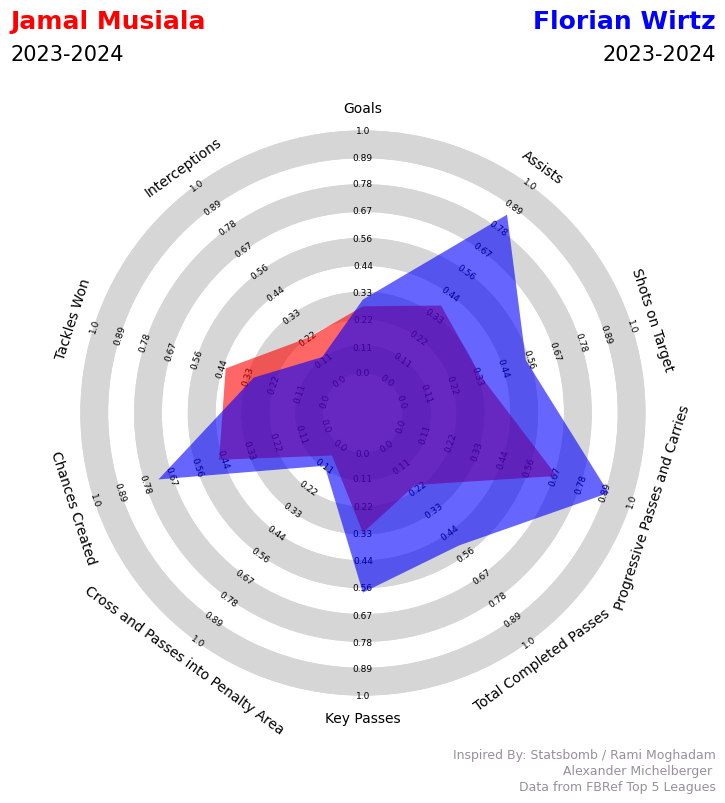

In [135]:
radar = Radar()

fig, ax = radar.plot_radar(ranges = ranges, params = params, values = values, 
                           radar_color = ['red', 'blue'],
                           alpha = [0.75, 0.60], 
                           title = datainfo, 
                           endnote = endnote,
                           compare=True)